# Quantization of DWT-ransformed audio signals

In [1]:
import sounddevice as sd
import pywt
import math
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pylab

## Capture an audio sequence

In [2]:
def plot(x, y, xlabel='', ylabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.grid()
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.plot(x, y, '.', markersize=1)
    plt.show(block=False)

In [15]:
fs = 44100
duration = 80000/44100  # seconds
signal = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
print("Say something!")
while sd.wait():
    pass
print("done")
signal = signal.flatten()

Say something!
done


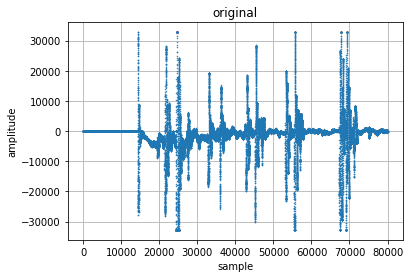

In [16]:
plot(np.linspace(0, len(signal)-1, num=len(signal)), signal, "sample", "amplitude", "original")


## Select the number of levels of the DWT

In [14]:
levels = 4

## Select a kernel filter

In [5]:
#wavelet_name = "haar"
wavelet_name = "db5"
#wavelet_name = "db20"
#wavelet_name = "bior2.2"
#wavelet_name = "rbio2.2"
wavelet = pywt.Wavelet(wavelet_name)

## Let's compute basis fuctions of the inverse DWT
Inverse transform of a unit impulse. The frequency response is also shown.

In [6]:
def deadzone_quantizer(x, quantization_step):
    k = (x / quantization_step).astype(np.int)
    return k

def deadzone_dequantizer(k, quantization_step):
    y = quantization_step * k
    return y

In [17]:
chunk_size = 1024
quantization_step = 128
chunk_number = 100
chunk = signal[chunk_size*chunk_number:chunk_size*(chunk_number+1)]
decomposition = pywt.wavedec(chunk, wavelet=wavelet, level=levels, mode="per")
coefficients, slices = pywt.coeffs_to_array(decomposition)
quantized_coeffs = deadzone_dequantizer(deadzone_quantizer(coefficients, quantization_step), quantization_step)
decomposition = pywt.array_to_coeffs(quantized_coeffs, slices, output_format="wavedec")
reconstructed_chunk = pywt.waverec(decomposition, wavelet=wavelet, mode="per")


/home/vruiz/.local/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


ValueError: Value of data_len must be greater than zero.

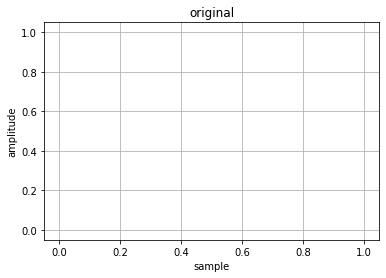

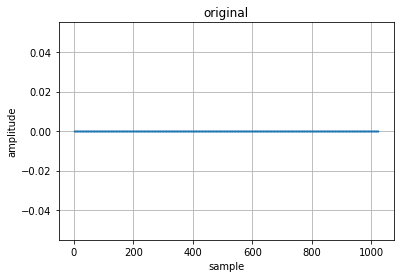

In [19]:
plot(np.linspace(0, len(chunk)-1, num=len(chunk)), chunk, "sample", "amplitude", "original")
plot(np.linspace(0, len(reconstructed_chunk)-1, num=len(reconstructed_chunk)), reconstructed_chunk, "sample", "amplitude", "original")